<a href="https://colab.research.google.com/github/ammarff/project-based-german-credit/blob/main/project_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Based - Pembelajaran Mesin

Anggota:

1. Dzaky Audizha Patarai - 1301204195
2. Vidya Haikal Imad Fadly -1301204253
3. Muhammad Ammar Fathin - 1301201053
4. Mohamad Zulistiyan - 1301204037

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ammarff/project-based-german-credit/main/dataset/german_credit.csv')
df.head()

,status;duration;credit_history;purpose;amount;savings;employment_duration;installment_rate;personal_status_sex;other_debtors;present_residence;property;age;other_installment_plans;housing;number_credits;job;people_liable;telephone;foreign_worker;credit_risk
0,no checking account;18;all credits at this ban...
1,no checking account;9;all credits at this bank...
2,... < 0 DM;12;no credits taken/all credits pai...
3,no checking account;12;all credits at this ban...
4,no checking account;12;all credits at this ban...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="amount",y="duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="age",y="amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="age",y="duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

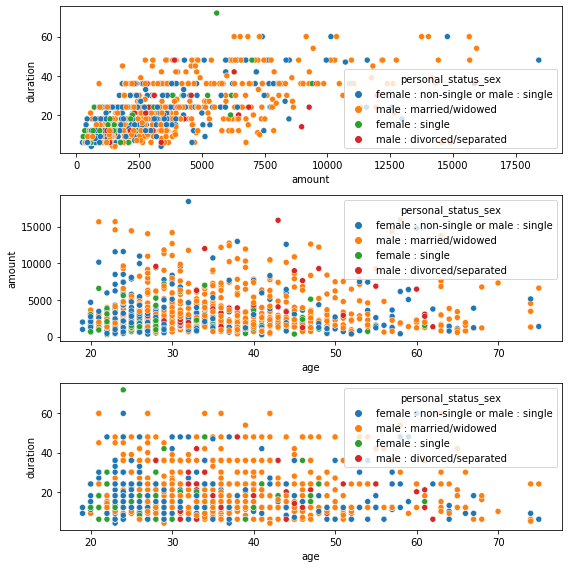

In [ ]:
scatters(df, h="personal_status_sex")